In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
#reading the data file
data=pd.read_csv('Restaurant_reviews.tsv',delimiter='\t',quoting=3)

In [3]:
#displaying first few data records of the file
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#displaying few data records at the end 
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
#displaying the shape of dat
data.shape

(1000, 2)

In [6]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
#importing natural language tool kit and regular expressions
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#cleaning the data
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl='  ',string=data['Review'][i])
    review=review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    review=' '.join(review)
    corpus.append(review)

In [9]:
#displaying corpus
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [10]:
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:, 1].values

In [11]:
#splitting data into train and test data sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.20, random_state=0)

In [12]:
#displaying the shape of train and test data sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [13]:
#importing MultinomialNB from naive-bayes
from sklearn.naive_bayes import MultinomialNB as MNB
classifier=MNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred=classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [15]:
#displaying the test accuracy
from sklearn.metrics import accuracy_score
score1=accuracy_score(y_test,y_pred)
print("Accuracy score is : {}%",format(round(score1*100,2)))

Accuracy score is : {}% 76.5


In [16]:
#displaying the test precision
from sklearn.metrics import precision_score
score2=precision_score(y_test,y_pred)
print("Precision score is : {}%",format(round(score2*100,2)))

Precision score is : {}% 76.42


In [17]:
#displaying the test recall
from sklearn.metrics import recall_score
score3=recall_score(y_test,y_pred)
print("Recall score is : {}%",format(round(score3*100,2)))

Recall score is : {}% 78.64


In [18]:
#displaying the training data accuracy
y_train_pred=classifier.predict(X_train)
score4=accuracy_score(y_train,y_train_pred)
print("Accuracy score is : {}%",format(round(score4*100,2)))

Accuracy score is : {}% 93.88


In [19]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[72, 25],
       [22, 81]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

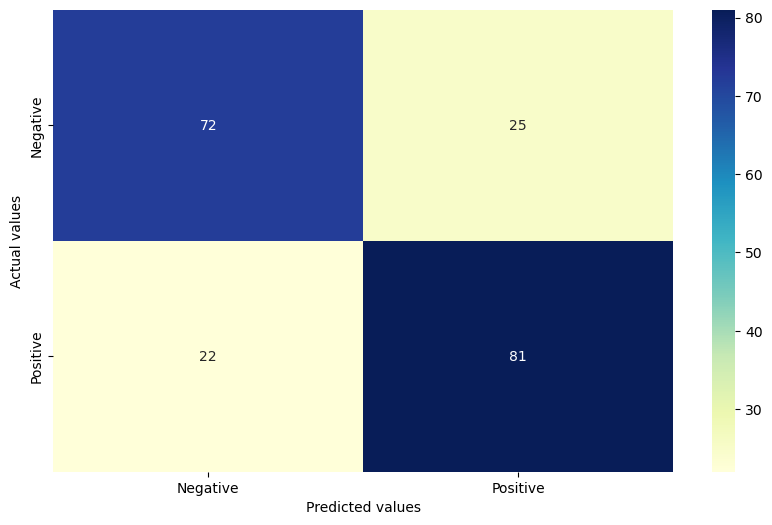

In [21]:
#importing matplot and pictorial representation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [22]:
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer as CoV
cv=CoV(max_features=1500)
P=cv.fit_transform(corpus).toarray()
q=data.iloc[:, 1].values

In [23]:
#splitting data into training and testing data sets
from sklearn.model_selection import train_test_split as TTS
P_train, P_test, q_train, q_test=TTS(P, q, test_size=0.20, random_state=0)

In [24]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as rfc
model=rfc(n_estimators=501,criterion='entropy')
model.fit(P_train,q_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [25]:
q_pred=model.predict(P_test)

q_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [26]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(q_test,q_pred)

In [27]:
cm1

array([[88,  9],
       [48, 55]], dtype=int64)

In [28]:
#accuracy of test data set
from sklearn.metrics import accuracy_score
score5=accuracy_score(q_test,q_pred)
print("Accuracy score is : {}%",format(round(score5*100,2)))

Accuracy score is : {}% 71.5


In [29]:
#precision of test data set
from sklearn.metrics import precision_score
score6=precision_score(q_test,q_pred)
print("Precision score is : {}%",format(round(score6*100,2)))

Precision score is : {}% 85.94


In [30]:
#recall of test data set
from sklearn.metrics import recall_score
score7=recall_score(q_test,q_pred)
print("Recall score is : {}%",format(round(score7*100,2)))

Recall score is : {}% 53.4


In [31]:
#accuracy score of training data set
q_train_pred=classifier.predict(P_train)
score8=accuracy_score(q_train,q_train_pred)
print("Accuracy score is : {}%",format(round(score8*100,2)))

Accuracy score is : {}% 93.88


Text(95.72222222222221, 0.5, 'Actual values')

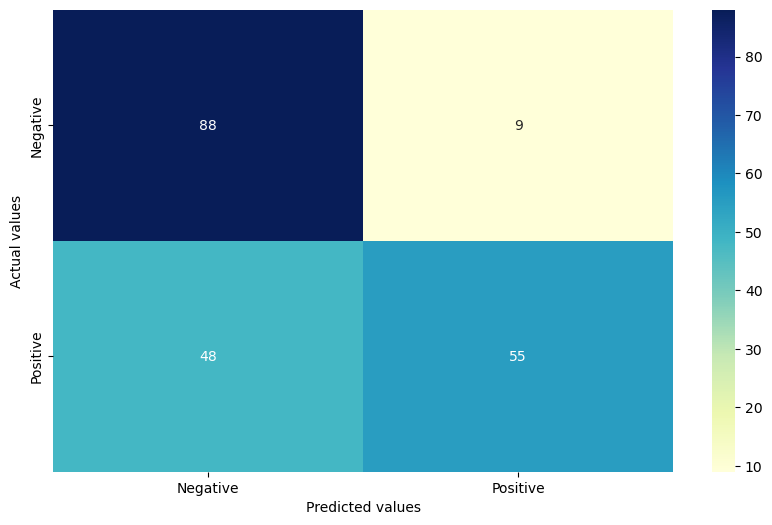

In [32]:
#pictorial representation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm1,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [33]:
#sample predictions
def predict_sentiment(sample_review):
    sample_review= re.sub(pattern='[^a-zA-Z]',repl='  ', string = sample_review)
    sample_review=sample_review.lower() 
    sample_review_words= sample_review.split()
    sample_review_words= [word for word in sample_review_words if not word in set(stopwords.words("english"))]
    ps= PorterStemmer()
    final_review= [ps.stem(word) for word in sample_review_words]
    final_review='  '.join(final_review)
    temp=cv.transform([final_review]).toarray() 
    return classifier.predict(temp)

In [34]:
#providing a bad review to test the performance of models
sample_review="The food is really bad."

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')

This is a NEGATIVE review.


In [35]:
#providing a good review to test the performance of models
sample_review="The food is too good."

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')

This is a POSITIVE review.
